<a href="https://colab.research.google.com/github/Franvmacias/Coderhouse/blob/main/DatasetCasen_Villagra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Casen

### Pyreadstat es necesario instalarla pero no importarla porque no viene por defecto en la librería Pandas

In [ ]:
pip install pyreadstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 19.5 MB/s eta 0:00:00


In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=c3387c211e2fde850cd1fb7d7b3b9e403c77d7c645c888a0c22d74a3a9e0ca2e
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


# Importamos las librerías que usaremos:

In [ ]:
import os
import warnings
import sys
import joblib
import numpy as np
import pandas as pd
import ppscore as pps
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn import metrics
import statsmodels.api as sm
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Nos conectamos nuestro Google Drive y leemos el archivo correspondiente

In [ ]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'
df_casen2020 = pd.read_spss('Datasets/Casen_en_Pandemia_2020_revisada202209.sav')

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
#Elegimos las variables con las que vamos a trabajar
df = df_casen2020[['region', 'provincia', 'sexo', 'zona', 'edad', 'y1_preg', 'e6a', 'tot_per',
                   'p6_p_con', 'ecivil', 'nucleo', 'o4', 'o7', 'oficio1_08', 'p6', 'o29',
                   'y2_dias', 'y2a_preg', 'y1', 'y28_2f', 'y0701', 'ymes', 'ytoth', 's28',
                   'men18c', 'may60c', 'tipohogar', 'r3', 'r1b_comuna_esp','v1', 'v13',
                   'v20', 'pobreza', 'educ', 'inmigrante', 'esc', 'esc2', 'p8']]


In [ ]:
df.columns

Index(['region', 'provincia', 'sexo', 'zona', 'edad', 'y1_preg', 'e6a',
       'tot_per', 'p6_p_con', 'ecivil', 'nucleo', 'o4', 'o7', 'oficio1_08',
       'p6', 'o29', 'y2_dias', 'y2a_preg', 'y1', 'y28_2f', 'y0701', 'ymes',
       'ytoth', 's28', 'men18c', 'may60c', 'tipohogar', 'r3', 'r1b_comuna_esp',
       'v1', 'v13', 'v20', 'pobreza', 'educ', 'inmigrante', 'esc', 'esc2',
       'p8'],
      dtype='object')

In [ ]:
df.describe()

,edad,tot_per,nucleo,p6,y2_dias,y1,y0701,ymes,ytoth,esc,esc2,p8
count,185437.000000,185437.000000,185437.000000,185437.000000,38392.000000,4.041800e+04,1.411600e+04,7.436000e+03,1.854370e+05,148886.000000,148886.000000,5387.000000
mean,38.401587,3.705533,1.162939,3.791757,23.481116,6.538916e+05,4.425652e+05,1.295699e+05,1.087862e+06,11.332086,11.334256,2.364953
std,22.843378,1.644605,0.421965,1.738785,6.905722,7.092225e+05,1.711499e+06,1.664453e+05,1.584013e+06,4.258773,4.265327,0.958913
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.200000e+03,1.000000e+03,2.000000e+03,0.000000e+00,0.000000,0.000000,2.000000
25%,19.000000,3.000000,1.000000,3.000000,20.000000,3.200000e+05,1.200000e+05,6.000000e+04,4.366260e+05,9.000000,9.000000,2.000000
50%,37.000000,4.000000,1.000000,4.000000,24.000000,4.000000e+05,2.500000e+05,1.000000e+05,7.316670e+05,12.000000,12.000000,2.000000
75%,57.000000,5.000000,1.000000,5.000000,30.000000,7.500000e+05,4.000000e+05,1.500000e+05,1.223083e+06,15.000000,15.000000,2.000000
max,110.000000,18.000000,7.000000,21.000000,31.000000,2.500000e+07,1.500000e+08,6.000000e+06,2.252000e+08,22.000000,32.000000,12.000000


In [ ]:
df.head()

,region,provincia,sexo,zona,edad,y1_preg,e6a,tot_per,p6_p_con,ecivil,...,r1b_comuna_esp,v1,v13,v20,pobreza,educ,inmigrante,esc,esc2,p8
0,Región de Tarapacá,Iquique,Mujer,Urbano,34.0,NaN,Educación Media Científico-Humanista,2.0,Casa pareada por ambos lados,Soltero(a),...,,"Pieza en casa antigua, en conventillo, en galp...",Arrendada,Red pública,No pobres,Media humanista completa,Inmigrante,12.0,12.0,NaN
1,Región de Tarapacá,Iquique,Mujer,Urbano,4.0,NaN,Educación Especial (Diferencial),2.0,Casa pareada por ambos lados,NaN,...,,"Pieza en casa antigua, en conventillo, en galp...",Arrendada,Red pública,No pobres,Sin educación formal,No inmigrante,NaN,NaN,NaN
2,Región de Tarapacá,Iquique,Hombre,Urbano,45.0,Sí,Técnico Nivel Superior Incompleto (Carreras 1 ...,3.0,"Pieza en casa antigua, en conventillo, en galp...",Soltero(a),...,,Departamento,Arrendada,Red pública,No pobres,Técnico nivel superior incompleta,Inmigrante,15.0,15.0,NaN
3,Región de Tarapacá,Iquique,Mujer,Urbano,5.0,NaN,Educación Básica,3.0,"Pieza en casa antigua, en conventillo, en galp...",NaN,...,,Departamento,Arrendada,Red pública,No pobres,Básica incompleta,Inmigrante,NaN,NaN,NaN
4,Región de Tarapacá,Iquique,Mujer,Urbano,19.0,NaN,Técnico Nivel Superior Incompleto (Carreras 1 ...,3.0,"Pieza en casa antigua, en conventillo, en galp...",Soltero(a),...,,Departamento,Arrendada,Red pública,No pobres,No sabe,Inmigrante,NaN,NaN,NaN


#Pre-entrega 1:

*   Abstract con motivación y audiencia
*   Preguntas/hipótesis que queremos resolver mediante el análisis
*   Análisis Exploratorio de Datos
*   Recomendaciones basadas en los insights observados
*   Apartados por Deficinición de objetivo, contexto comercial, problema comercial, contexto analítico, exploración de datos.



Abstract:
El dataset elegido es una encuesta realizada en Chile desde el año 1987, su nombre es la abreviación de "Encuesta de Caracterización Socioeconómica Nacional". Esta encuesta es desarrollada por el Ministerio del Desarrollo Social y Familia, cada 3 o 4 años (dependiendo de las circunstancias y gobiernos de turno). En esta encuesta se busca tener una imagen de cómo está el país socioeconómicamente hablando, ver la composición de hogares de la mayoría, la educación e ingresos.
La idea principal de la encuesta es reconocer diagnósticos actualizados, saber a quiénes tiene que apoyar más, cuales sectores necesitan ayuda, cuántas personas en situación de discapacidad o dependencia existen, etc.
Al identificar las carencias y demandas de los grupos minoritarios y mayoritarios, podemos armar distintos planes de gobierno para poder responder a esas demanda.
La encuesta tiene cobertura nacional y podemos analizar distintas variables ya sea por región, comuna o provincia, la encuesta es totalmente anonimizada pero representan a cada uno de los lugares debido a que incluye un factor de expansión.
Durante este proyecto, quisiera investigar cómo ha ido evolucionando el trabajo de las mujeres, si ha disminuido a través del tiempo, si ha evolucionado, si han disminuido las brechas salariales y porqué, cuáles son las oportunidades que tienen y cuánto afecta el entorno en dónde viven y otras variables que pueden influir tanto como en el sueldo o en el trabajo de una mujer.
Bien se sabe que las mujeres tienen más barreras para trabajar que los hombres y que hay una brecha salarial que es importante incluso hoy en día con compañeros de un mismo puesto, misma experiencia y distintos sueldos. Lo que se quiere investigar y concluir es por qué y qué tan probable es que pasen dependiendo del entorno, familia, lugar, etnia, etc. En este caso analizaremos la encuesta 2020 pero puede que se incluyan encuestas de otros años también.


Definición de Objetivo: necesitamos encontrar los principales factores que afectan a la brecha salarial entre hombres y mujeres y además, observar de manera exhaustiva cuánto ha crecido y quizás encontrar el por qué.

Contexto Comercial: debido a que esta encuesta no tiene un fin comercial pero si podemos visualizar el ingreso/sueldo de cada una de las personas, podremos ver la distinción entre lo que ganan mujeres y hombre según zonas que pueden influir en esta misma brecha. Durante este trabajo construiremos visualizaciones para poder responder todas las posibles preguntas que puedan haber en relación sueldo/género.

Problema Comercial: debemos limpiar, ordenar y formatear los datos entregados para poder responder las preguntas de los clientes.

Contexto Analítico: se obtiene la encuesta Casen 2020 que contiene la encuesta socioeconómica más grande de Chile, esta contiene columnas como zona, provincia, region, ingresos, oficios, edad, nucleo familiar, tipo de trabajo, tipo de ingresos, etc.

Realizaremos las siguientes tareas con los datos:


*   Extraer los datos desde el SPSS almacenados en la página oficial de la encuesta Casen.
*   Leer, transformar y preparar los datos para su visualización.
*   Realizaremos un análisis y construiremos visualizaciones de datos para identificar patrones en el set de datos.



In [ ]:
plt.style.use('seaborn-v0_8-pastel')

##Exploratory Data Analysis (EDA)

Columnas de interés:


*  **Región**: zona regional donde reside la persona, suele contener una o más provincias, en Chile son 16.
*   **Provincia:** zona provincial donde reside la persona.
*   **Sexo**: género de la persona.
*   **Zona**: rural o urbano.
*   **Edad**: edad del entrevistado
*   **y1_preg**: se pregunta si las personas que respondieron reciben algun tipo de sueldo por lo que hacen.
*   **e6a**: en esta columna las personas responden cuál es el máximo nivel educacional.
*   **tot_per**: total de personas que viven en la vivienda
*   **p6_p_con**: tipo de vivienda en donde reside
*   **ecivil**: estado civil del entrevistado.
*   **nucleo**: personas que componen el nucleo.
*   **o4**: ¿ha trabajado alguna vez?
*   **o7**: razón principal para no buscar trabajo.
*   **oficio1_08**: Oficio del entrevistado.
*   **tot_per**: Total de personas en el hogar
*   **p29**: Tuvo otro trabajo aparte del principal
*   **y1_preg**: sueldo en trabajo principal.
*   **y2_dias**: dias trabajados.
*   **y2a_preg**: dias trabajados.
*   **y1**: monto por trabajo principal
*   **y28_2f**: Jubilación o Pensión de Invalidez
*   **y0701**: monto por trabajo independiente
*   **ymes**: pensión de alimentos
*   **y0701**: monto por trabajo independiente
*   **ytoth**: ingreso total del hogar
*   **s28**: Durante los últimos 12 meses, ¿Ha estado en tratamiento médico?
*   **men18c**: Presencia menores de 18 en el hogar
*   **may60c**: Presencia mayores de 60 en el hogar
*   **tipohogar**: tipo de hogar
*   **hacinamiento**: nivel de hacinamiento
*   **indsan**: Índice de saneamiento en la vivienda (acceso a servicios básicos)
*   **ten_viv**: Condición de tenencia de la vivienda
*   **ten_viv_f**: Condición de tenencia formal o informal de la vivienda
*   **r3**: pueblos indigenas
*   **r1b_comuna_esp**: comuna donde vivia su madre
*   **v1**: ¿Cuál es el tipo de vivienda en el que usted reside?
*   **v13**: Su hogar, ¿bajo qué situación ocupa la vivienda?
*   **v20**:  ¿De dónde proviene el agua de la vivienda?
*   **pobreza**: Situación de pobreza por ingreso
*   **educ**: Nivel de escolaridad
*   **inmigrante**: Persona que no nació en Chile


In [ ]:
muj = df[(df.sexo == 'Mujer') & (df.edad >= 18)]
hom = df[(df.sexo == 'Hombre') & (df.edad >= 18)]

In [ ]:
#Counting missing values
with pd.option_context('mode.use_inf_as_na', True):
    display(df.isna().sum())


region                 0
provincia              0
sexo                   0
zona                   0
edad                   0
y1_preg           136283
e6a                    0
tot_per                0
p6_p_con               0
ecivil             31545
nucleo                 0
o4                104698
o7                114961
oficio1_08        114861
p6                     0
o29               114861
y2_dias           147045
y2a_preg          144308
y1                145019
y28_2f            182608
y0701             171321
ymes              178001
ytoth                  0
s28                    0
men18c                 0
may60c                 0
tipohogar              0
r3                     0
r1b_comuna_esp         0
v1                     0
v13                    0
v20                    0
pobreza               98
educ                   0
inmigrante             0
esc                36551
esc2               36551
p8                180050
dtype: int64

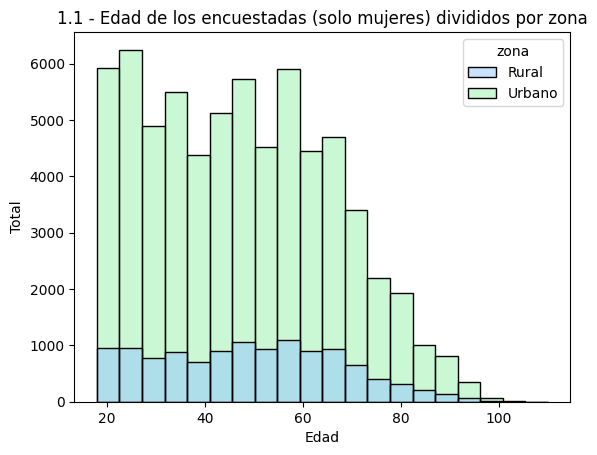

In [ ]:
sns.histplot(data=muj, x="edad", hue="zona", bins=20);
plt.title('1.1 - Edad de los encuestadas (solo mujeres) divididos por zona');
plt.xlabel('Edad');
plt.ylabel('Total');

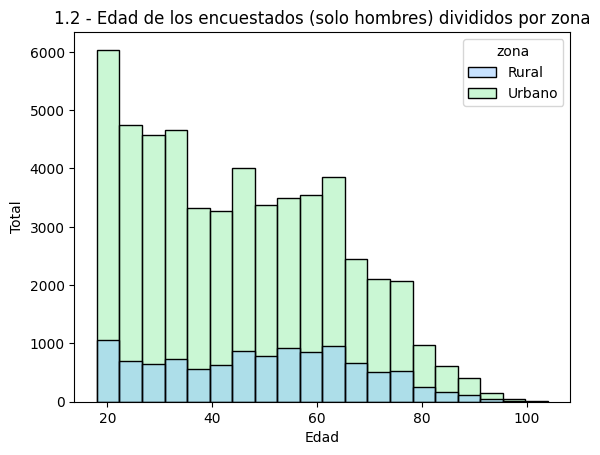

In [ ]:
sns.histplot(data=hom, x="edad", hue="zona", bins=20);
plt.title('1.2 - Edad de los encuestados (solo hombres) divididos por zona');
plt.xlabel('Edad');
plt.ylabel('Total');

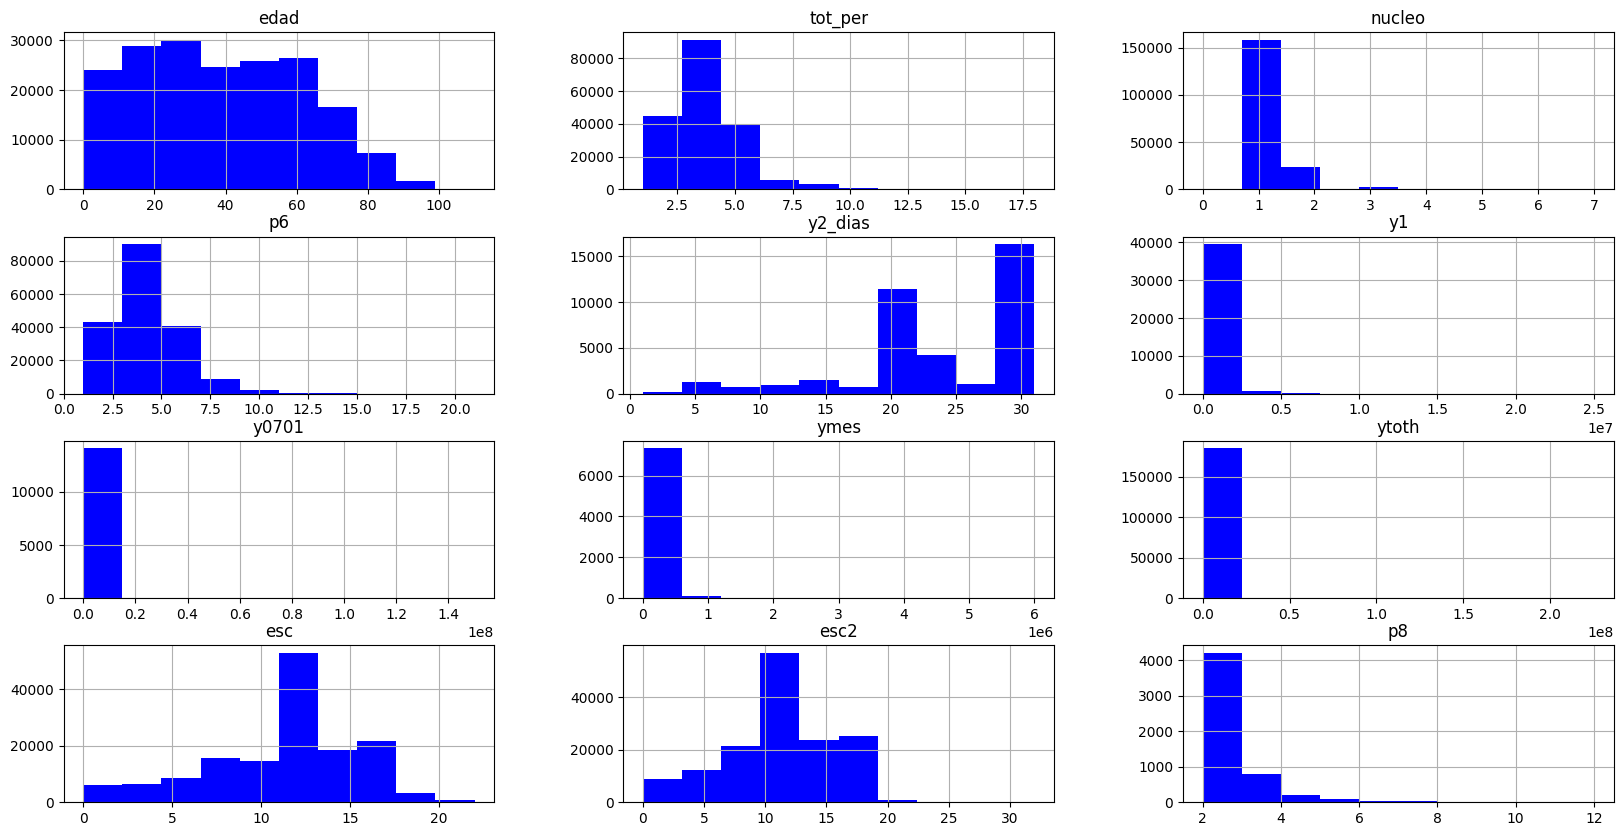

In [ ]:
hists = df.hist(figsize=(20,10), color = 'blue')

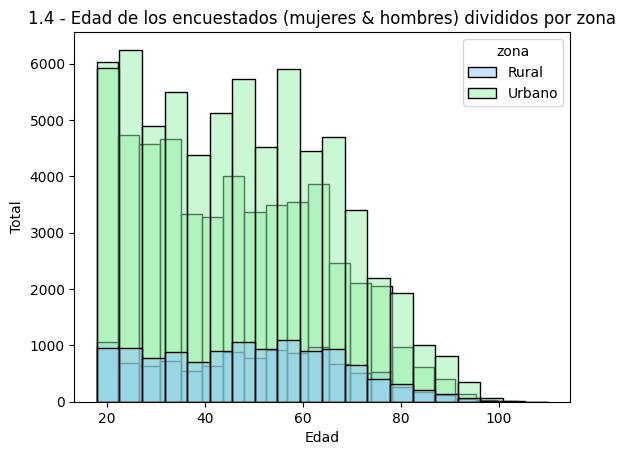

In [ ]:
sns.histplot(data=hom, x="edad", hue="zona", bins=20); #dataset hombres
sns.histplot(data=muj, x="edad", hue="zona", bins=20); #dataset mujeres
plt.title('1.4 - Edad de los encuestados (mujeres & hombres) divididos por zona');
plt.xlabel('Edad');
plt.ylabel('Total');

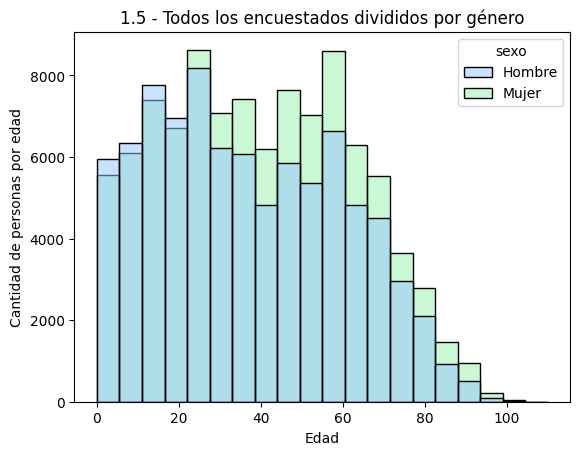

In [ ]:
sns.histplot(data=df, x="edad", hue="sexo", bins=20);
plt.title('1.5 - Todos los encuestados divididos por género');
plt.xlabel('Edad');
plt.ylabel('Cantidad de personas por edad');

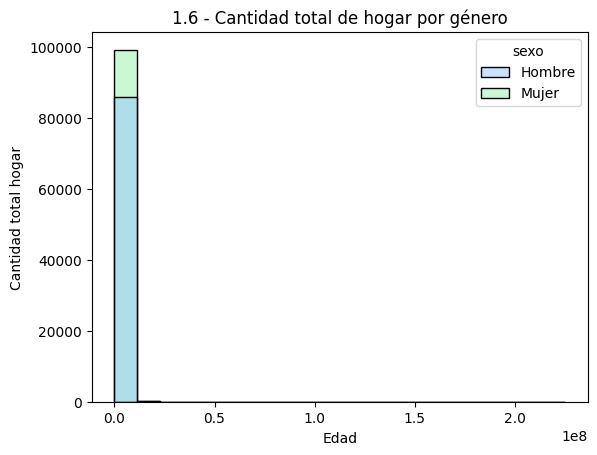

In [ ]:
sns.histplot(data=df, x="ytoth", hue="sexo", bins=20);
plt.title('1.6 - Cantidad total de hogar por género');
plt.xlabel('Edad');
plt.ylabel('Cantidad total hogar');

In [ ]:
#Create different variables based on type
pd.set_option('display.max_seq_items', None)#max_se_items is to see all the elementes within the index
categoricas = df.select_dtypes(['object']).columns
numericas = df.select_dtypes(['int64','float64']).columns

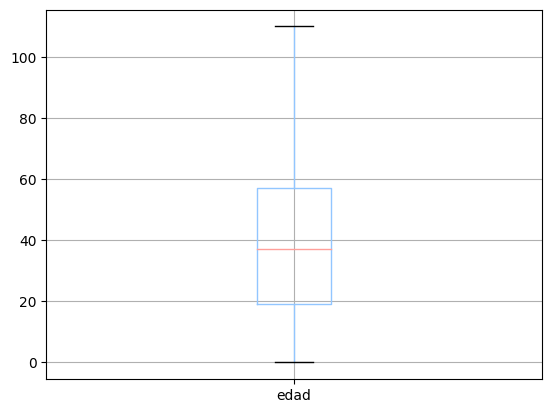

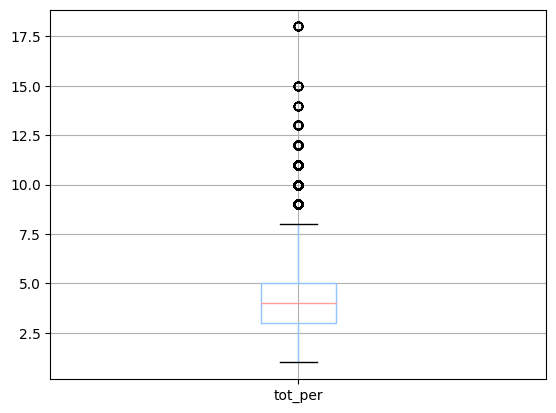

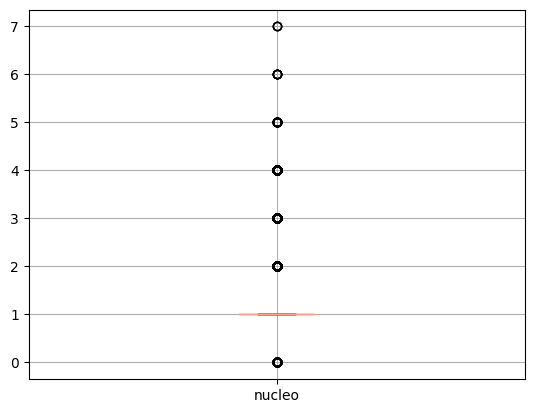

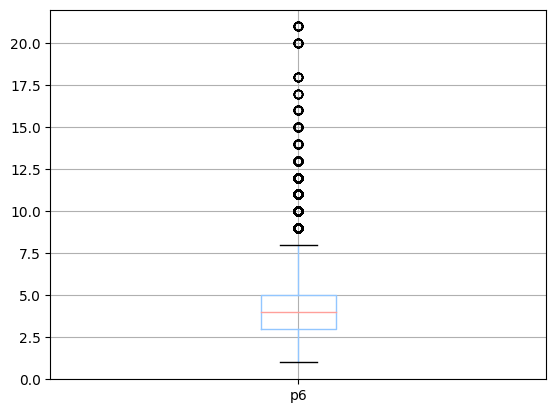

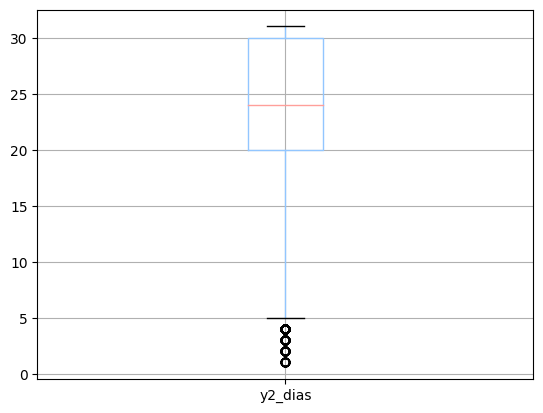

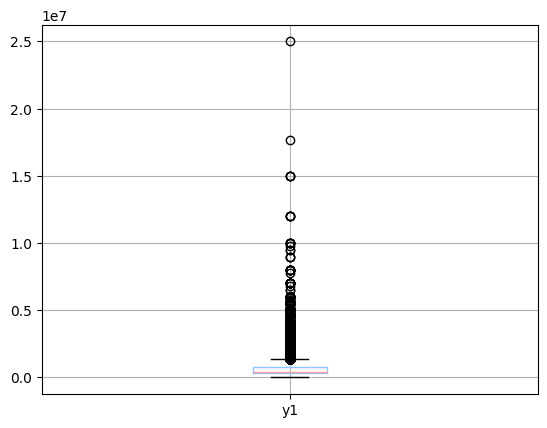

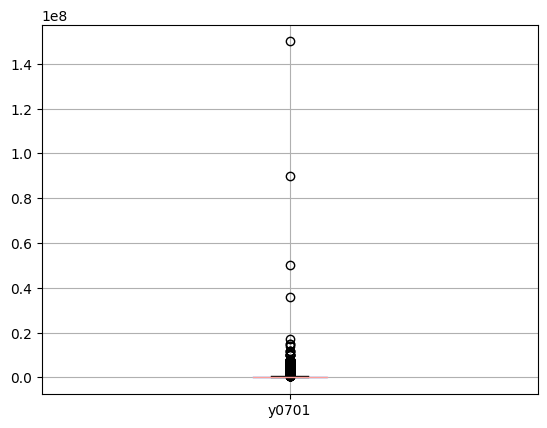

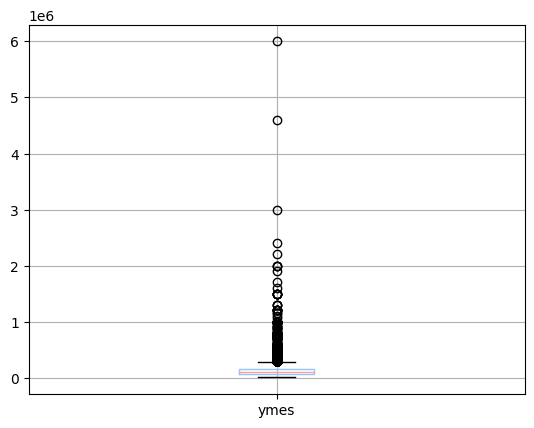

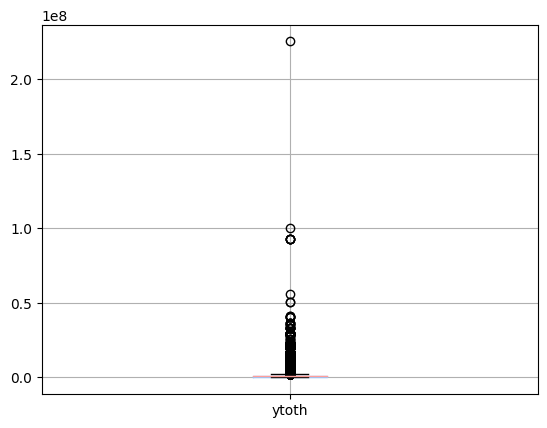

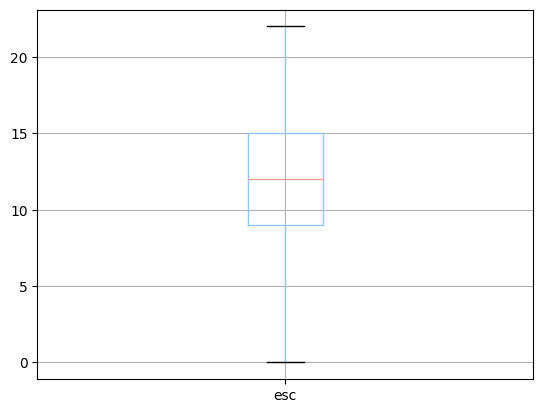

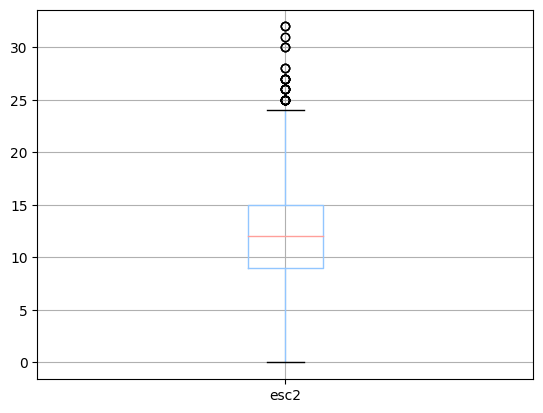

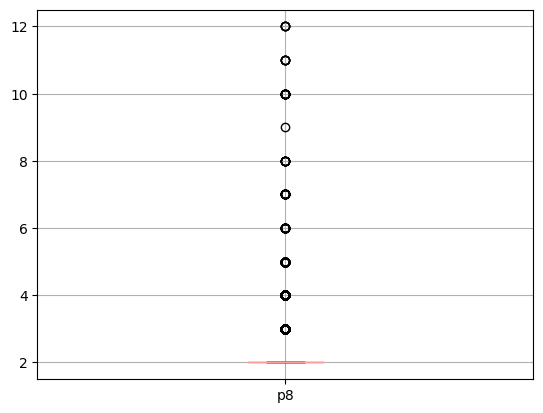

In [ ]:
#Creating boxplots to see the outliers
for column in numericas:
    plt.figure()
    df.boxplot([column])

In [ ]:
# Outliers by standard deviation (3 sigmas)
(np.abs(stats.zscore(df[numericas]))>3).sum()

edad          2
tot_per    2162
nucleo     2959
p6         1503
y2_dias       0
y1            0
y0701         0
ymes          0
ytoth      2570
esc           0
esc2          0
p8            0
dtype: int64

In [ ]:
#Outliers by quarter (5%)
(df[numericas]<df[numericas].quantile(0.05)).sum()

edad       9169
tot_per       0
nucleo       98
p6            0
y2_dias    1621
y1         1669
y0701       581
ymes        372
ytoth      9270
esc        6034
esc2       6034
p8            0
dtype: int64

In [ ]:
#Outliers by quarter (95%)
(df[numericas]>df[numericas].quantile(0.95)).sum()

edad       9131
tot_per    4458
nucleo     2959
p6         5615
y2_dias     215
y1         1972
y0701       701
ymes        346
ytoth      9271
esc        4322
esc2       4322
p8          169
dtype: int64

In [ ]:
#Eliminamos valores nulos
df.dropna(inplace = False)

,region,provincia,sexo,zona,edad,y1_preg,e6a,tot_per,p6_p_con,ecivil,...,r1b_comuna_esp,v1,v13,v20,pobreza,educ,inmigrante,esc,esc2,p8


In [ ]:
df['gender'] = df['sexo'].apply(lambda x: 0 if x == 'Mujer' else 1)
#transformamos la columna sexo en la columna genero con sus variables ahora numericas

In [ ]:
df['gender'] = df['gender'].astype('int64')

In [ ]:
#agrupamos las variables numericas
numericas = ['edad', 'tot_per', 'nucleo', 'esc', 'esc2', 'p6', 'p8', 'y2_dias', 'y1', 'y0701', 'ymes',
       'ytoth','gender']

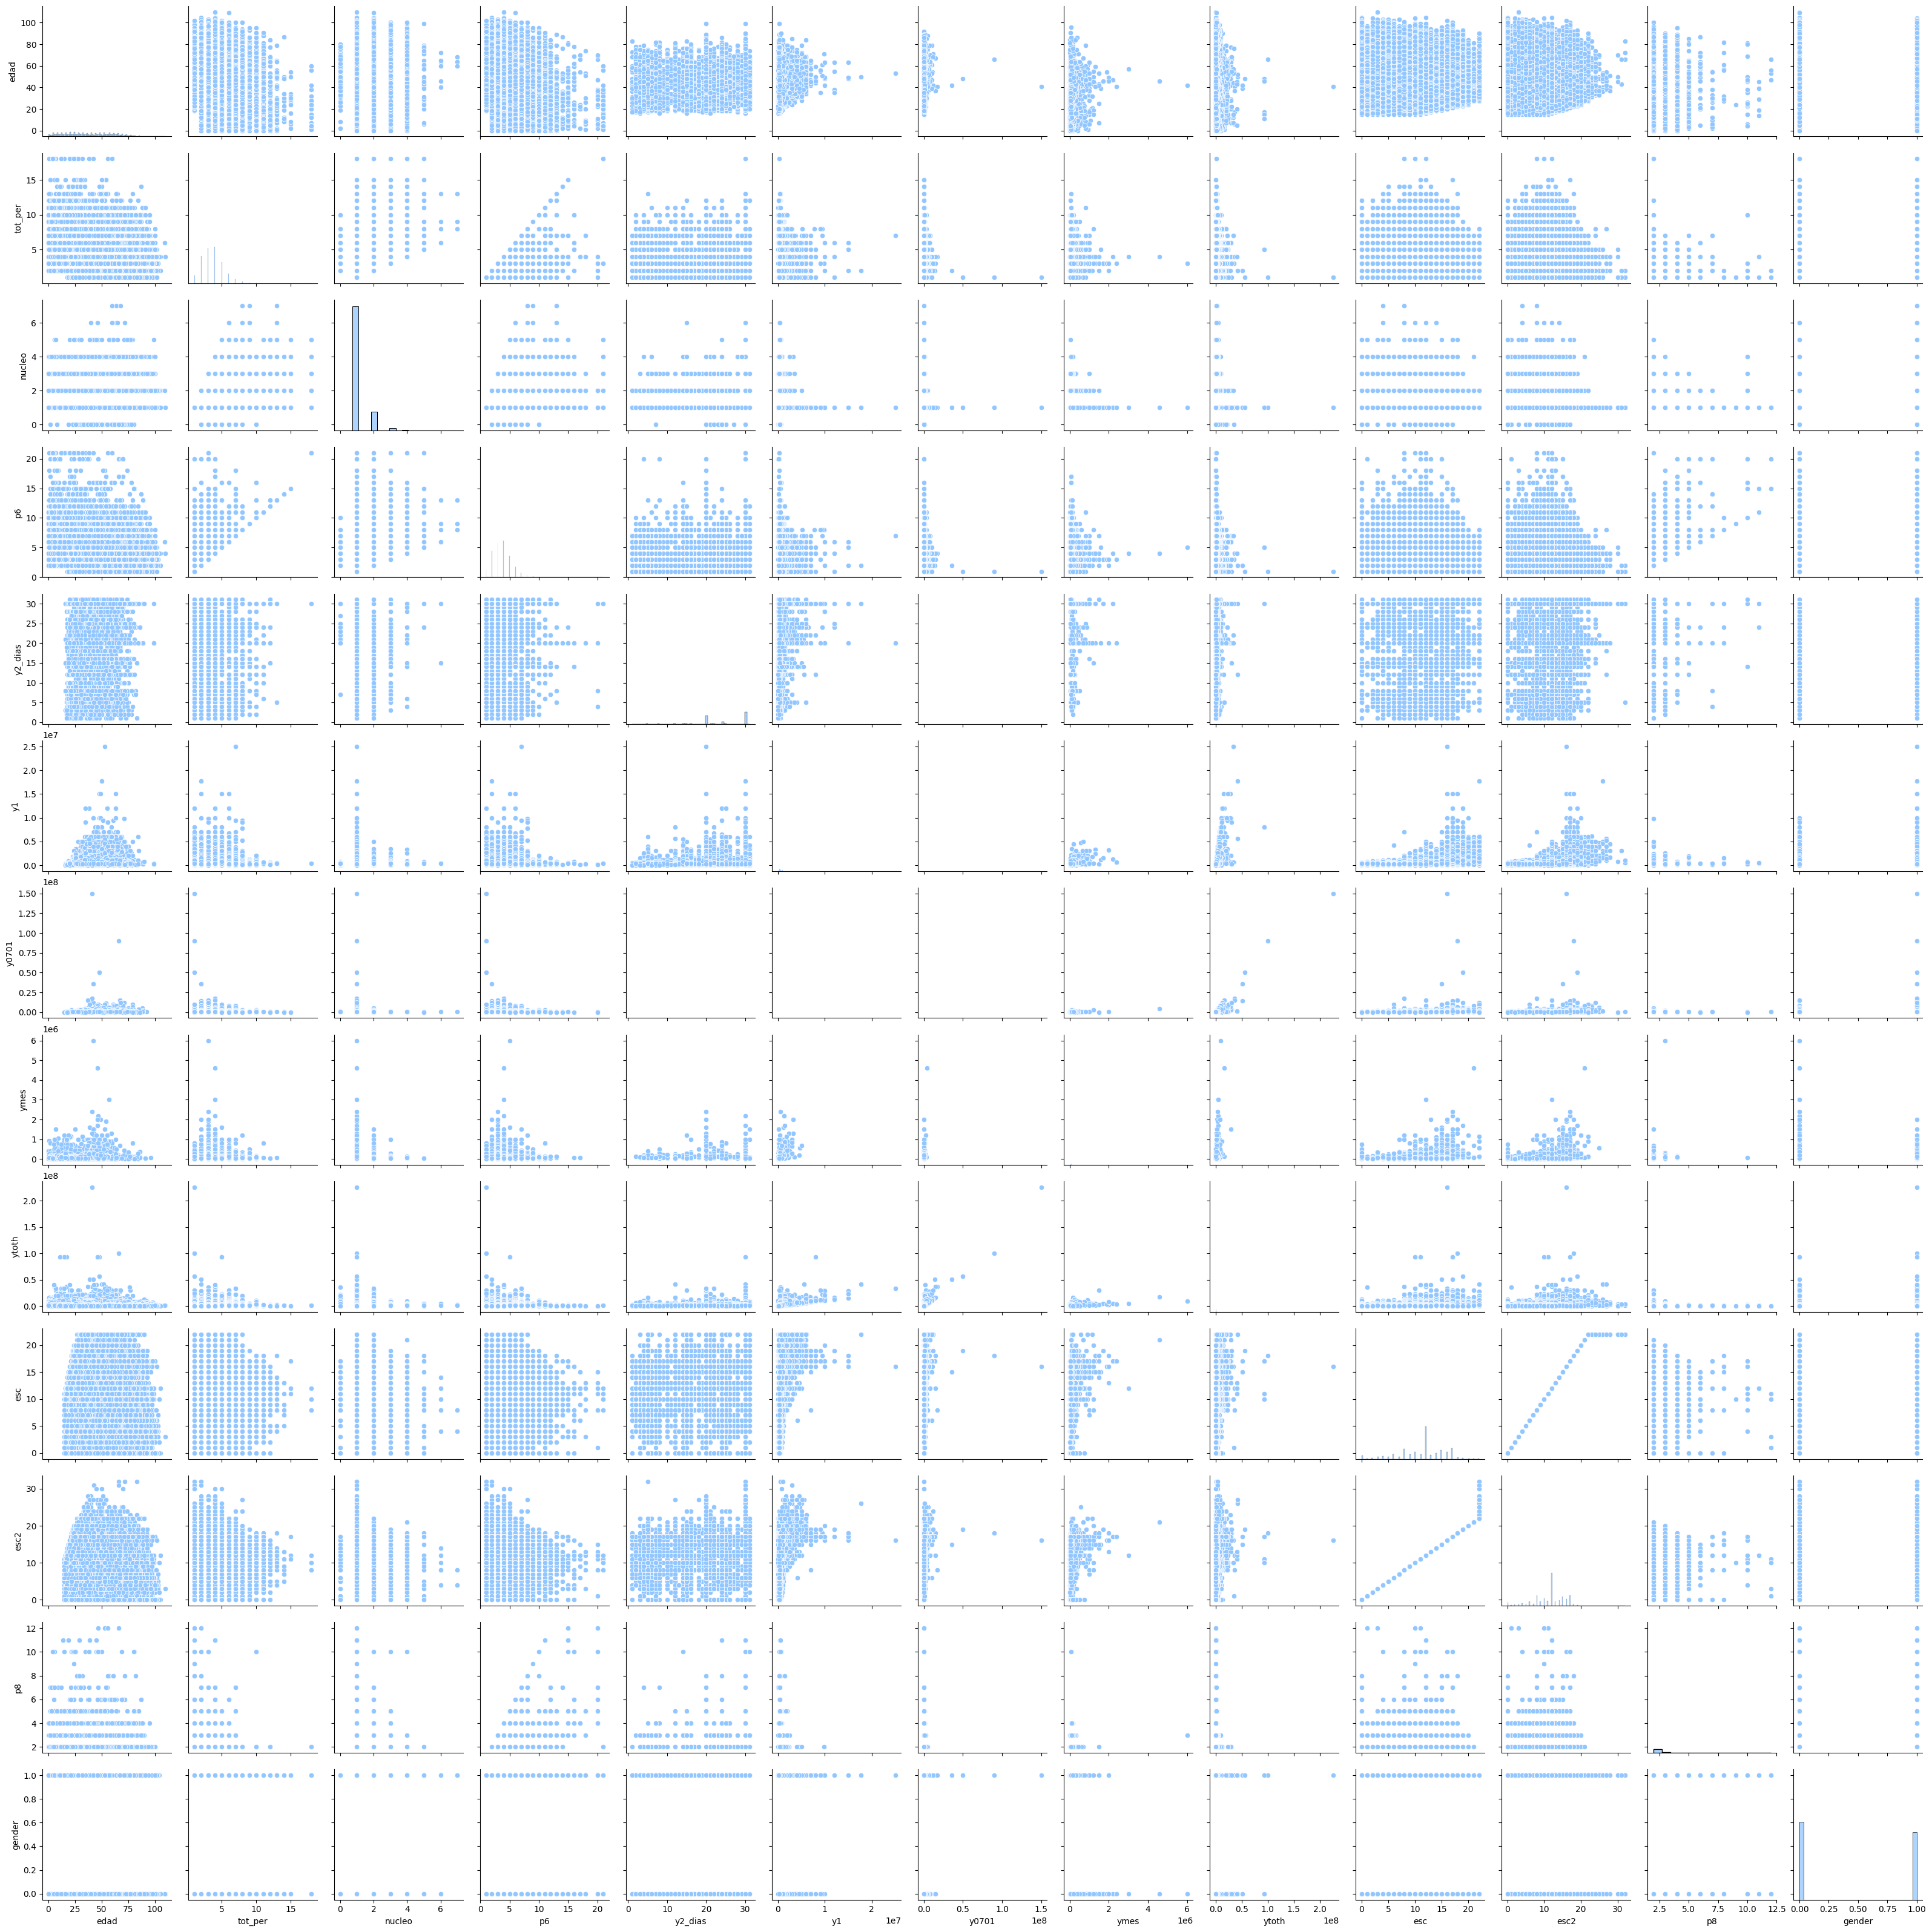

In [ ]:
#Graphical Relationship
sns.pairplot(df).savefig('graficas.png')

In [ ]:
#creación de datos de entrenamiento, esto servirá para eliminar outliers e imputaciones de variables númericas

ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df):
    print(len(train_index))
    print(len(test_index))
df['Train'] = 0
df.loc[df.index.isin(train_index),'Train'] = 1

129805
55632


In [ ]:
#Imputación de variables númericas
for var in numericas:
    x = df.loc[df['Train'] == 1, var].mean()
    df[var].fillna(x, inplace = True)

In [ ]:
#Eliminar outlier by LocalOutlierFactor
outlierDetector = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02, novelty = True)
outlierDetector.fit(df.loc[df['Train'] == 1, numericas])
ind_train = outlierDetector.predict(df[numericas])
tabla = df.loc[ind_train == 1]

In [ ]:
# Outliers por desviaciones estándar (3 sigmas)
(np.abs(stats.zscore(df[numericas]))>3).sum()

edad          2
tot_per    2162
nucleo     2959
esc           0
esc2        114
p6         1503
p8         1169
y2_dias    3757
y1         2507
y0701       477
ymes        991
ytoth      2570
gender        0
dtype: int64

In [ ]:
# Imputación de valores nulos (variables numéricas)
filtroTrain = df.loc[:,'Train'] == 1
for var in numericas:
    lim_sup = df.loc[filtroTrain, var].quantile(0.99)
    lim_inf = df.loc[filtroTrain, var].quantile(0.01)
    df[var].clip(lim_inf, lim_sup, inplace=True)

In [ ]:
# Imputación de valores nulos (variables cualitativas)
df2 = []
categoricas = ['sexo','region','zona', 'ecivil', 'educ']
df2 = pd.get_dummies(df2, columns = categoricas, drop_first=True)

In [ ]:
#Spearman correlation
df.corr(method = 'spearman')
# interesantemente podemos ver que ytoth y y0701(por trabajo independiente) tienen correlación, quizas mas debil pero de algunas que se pueden destacar
# y1 e ytoth también son correlacionados solo que uno pregunta el total del hogar y el otro el sueldo recibido anteriormente, puede que no cambie mucho si es el unico ingreso del hogar
#tot_per (total de personas y ytoth, tienen relacion, entre más gente hay en el hogar más dinero ingresa al hogar)


<ipython-input-35-f3dfb449b918>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,edad,tot_per,nucleo,p6,y2_dias,y1,y0701,ymes,ytoth,esc,esc2,p8,gender,Train
edad,1.000000,-0.362405,-0.126835,-0.355085,0.016538,-0.041353,-0.058124,0.091525,-0.074080,-0.153516,-0.153516,0.003254,-0.064491,0.003618
tot_per,-0.362405,1.000000,0.302506,0.963794,-0.004759,-0.010522,0.024645,-0.015452,0.250336,0.008580,0.008580,0.052693,0.028569,-0.005708
nucleo,-0.126835,0.302506,1.000000,0.291542,-0.004894,-0.029116,0.010690,-0.033648,0.055482,-0.005818,-0.005818,0.022016,-0.030148,0.000344
p6,-0.355085,0.963794,0.291542,1.000000,-0.005444,-0.015366,0.019526,-0.016671,0.233474,0.002199,0.002199,-0.136306,0.026723,-0.004402
y2_dias,0.016538,-0.004759,-0.004894,-0.005444,1.000000,-0.012196,0.005600,0.005482,0.033014,0.010145,0.010145,0.001151,0.031637,-0.001401
y1,-0.041353,-0.010522,-0.029116,-0.015366,-0.012196,1.000000,-0.034629,0.007311,0.089800,0.086502,0.086502,0.016258,-0.009829,0.001859
y0701,-0.058124,0.024645,0.010690,0.019526,0.005600,-0.034629,1.000000,0.002638,0.084914,0.066319,0.066319,0.015844,-0.001093,0.000504
ymes,0.091525,-0.015452,-0.033648,-0.016671,0.005482,0.007311,0.002638,1.000000,0.046470,0.016702,0.016702,0.004043,0.012028,0.005062
ytoth,-0.074080,0.250336,0.055482,0.233474,0.033014,0.089800,0.084914,0.046470,1.000000,0.281722,0.281722,0.038642,0.035671,-0.002114
esc,-0.153516,0.008580,-0.005818,0.002199,0.010145,0.086502,0.066319,0.016702,0.281722,1.000000,1.000000,0.015280,-0.006456,0.005698


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='ytoth']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
22,region,ytoth,0.000000,regression,True,mean absolute error,632702.0946,683057.382999,DecisionTreeRegressor()
62,provincia,ytoth,0.000000,regression,True,mean absolute error,632702.0946,682593.089633,DecisionTreeRegressor()
102,sexo,ytoth,0.000000,regression,True,mean absolute error,632702.0946,698470.326161,DecisionTreeRegressor()
142,zona,ytoth,0.000000,regression,True,mean absolute error,632702.0946,694266.267926,DecisionTreeRegressor()
182,edad,ytoth,0.000000,regression,True,mean absolute error,632702.0946,702972.594166,DecisionTreeRegressor()
222,y1_preg,ytoth,0.000000,regression,True,mean absolute error,785303.1786,823120.568529,DecisionTreeRegressor()
262,e6a,ytoth,0.000000,regression,True,mean absolute error,632702.0946,635857.637407,DecisionTreeRegressor()
302,tot_per,ytoth,0.000000,regression,True,mean absolute error,632702.0946,680391.367662,DecisionTreeRegressor()
342,p6_p_con,ytoth,0.000000,regression,True,mean absolute error,632702.0946,681567.405430,DecisionTreeRegressor()
382,ecivil,ytoth,0.000000,regression,True,mean absolute error,620343.0384,678214.113085,DecisionTreeRegressor()


<Axes: xlabel='x', ylabel='y'>

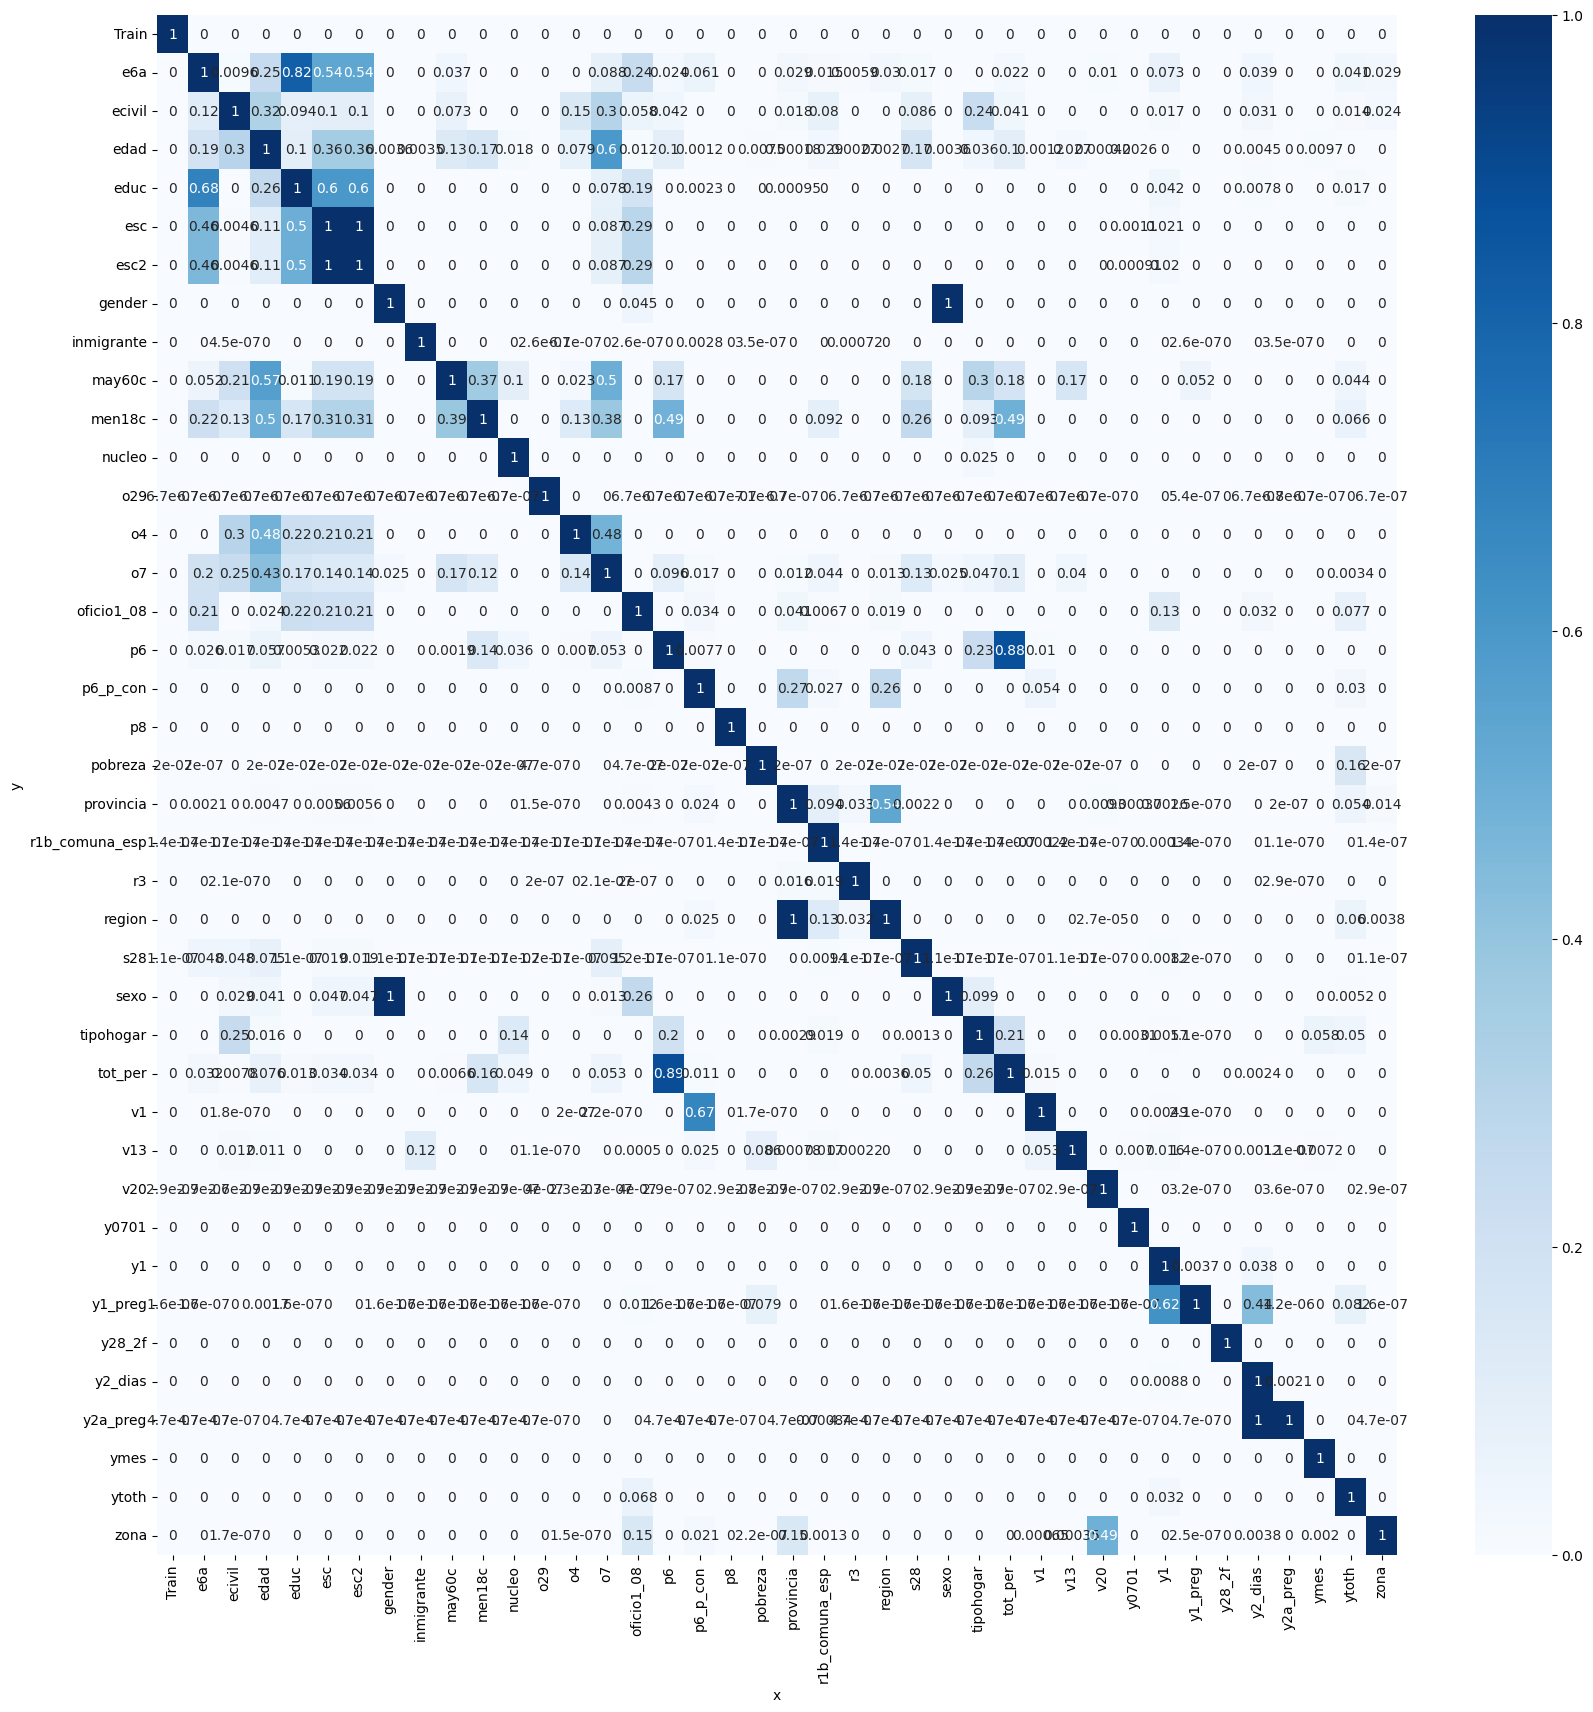

In [ ]:
#Exploración gráfica de las correlaciones hechas por ppscore
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
matrix_df = ppscoreT[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", annot=True, ax = ax)

In [ ]:
# Escalamos todas las columnas
scaler = MinMaxScaler()
scaler.fit(df.loc[df['Train'] == 1, numericas])
df[numericas] = scaler.transform(df[numericas])
df

,region,provincia,sexo,zona,edad,y1_preg,e6a,tot_per,p6_p_con,ecivil,...,v13,v20,pobreza,educ,inmigrante,esc,esc2,p8,gender,Train
0,Región de Tarapacá,Iquique,Mujer,Urbano,0.379310,NaN,Educación Media Científico-Humanista,0.125,Casa pareada por ambos lados,Soltero(a),...,Arrendada,Red pública,No pobres,Media humanista completa,Inmigrante,0.631579,0.631579,1.0,0.0,0
1,Región de Tarapacá,Iquique,Mujer,Urbano,0.034483,NaN,Educación Especial (Diferencial),0.125,Casa pareada por ambos lados,NaN,...,Arrendada,Red pública,No pobres,Sin educación formal,No inmigrante,0.597364,0.597482,1.0,0.0,1
2,Región de Tarapacá,Iquique,Hombre,Urbano,0.505747,Sí,Técnico Nivel Superior Incompleto (Carreras 1 ...,0.250,"Pieza en casa antigua, en conventillo, en galp...",Soltero(a),...,Arrendada,Red pública,No pobres,Técnico nivel superior incompleta,Inmigrante,0.789474,0.789474,1.0,1.0,1
3,Región de Tarapacá,Iquique,Mujer,Urbano,0.045977,NaN,Educación Básica,0.250,"Pieza en casa antigua, en conventillo, en galp...",NaN,...,Arrendada,Red pública,No pobres,Básica incompleta,Inmigrante,0.597364,0.597482,1.0,0.0,1
4,Región de Tarapacá,Iquique,Mujer,Urbano,0.206897,NaN,Técnico Nivel Superior Incompleto (Carreras 1 ...,0.250,"Pieza en casa antigua, en conventillo, en galp...",Soltero(a),...,Arrendada,Red pública,No pobres,No sabe,Inmigrante,0.597364,0.597482,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185432,Región de Ñuble,Punilla,Hombre,Rural,0.229885,NaN,Educación Media Técnica Profesional,0.375,Casa aislada (no pareada),Soltero(a),...,Propia,Pozo o noria,No pobres,Media técnica profesional completa,No inmigrante,0.631579,0.631579,1.0,1.0,1
185433,Región de Ñuble,Punilla,Hombre,Rural,0.517241,NaN,Nunca asistió,0.375,Casa aislada (no pareada),Soltero(a),...,Propia,Pozo o noria,No pobres,Sin educación formal,No sabe,0.000000,0.000000,1.0,1.0,0
185434,Región de Ñuble,Punilla,Hombre,Rural,0.804598,NaN,Profesional Completo (Carreras 4 ó más años),0.250,Casa aislada (no pareada),Casado(a),...,Propia,Pozo o noria,Pobres extremos,Postgrado incompleto,No inmigrante,0.894737,0.894737,1.0,1.0,0
185435,Región de Ñuble,Punilla,Mujer,Rural,0.747126,NaN,Educación Básica,0.250,Casa aislada (no pareada),Casado(a),...,Propia,Pozo o noria,Pobres extremos,Básica completa,No inmigrante,0.421053,0.421053,1.0,0.0,1


In [ ]:
pd.Series(['Mujer','Hombre']).astype('category').cat.codes

0    1
1    0
dtype: int8

In [ ]:
#comenzamos a preparar nuestros datos imputando valores nulos
for var in ['y1', 'ytoth', 'edad', 'esc', 'esc2',  'p6', 'p8', 'y2_dias', 'y1', 'y0701',
       'ytoth']:
    x = df.loc[df['Train'] == 1, var].mean()
    df[var].fillna(x, inplace = True)

In [ ]:
#Feature Selection - Forward selection
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:

sys.modules['sklearn.externals.joblib'] = joblib


In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=6,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
predictoras = df[['y1', 'ytoth', 'edad', 'esc', 'p6', 'p8', 'y2_dias', 'y0701']]
X = predictoras
X

,y1,ytoth,edad,esc,p6,p8,y2_dias,y0701
0,654504.216499,390833.0,34.0,12.000000,2.0,2.383119,23.478813,150000.000000
1,654504.216499,390833.0,4.0,11.349907,2.0,2.383119,23.478813,454815.725655
2,372000.000000,947583.0,45.0,15.000000,3.0,2.383119,8.000000,454815.725655
3,654504.216499,947583.0,5.0,11.349907,3.0,2.383119,23.478813,454815.725655
4,654504.216499,947583.0,19.0,11.349907,3.0,2.383119,23.478813,454815.725655
...,...,...,...,...,...,...,...,...
185432,654504.216499,273750.0,21.0,12.000000,4.0,2.383119,23.478813,454815.725655
185433,654504.216499,273750.0,46.0,0.000000,4.0,2.383119,23.478813,454815.725655
185434,654504.216499,0.0,71.0,17.000000,3.0,2.383119,23.478813,454815.725655
185435,654504.216499,0.0,66.0,8.000000,3.0,2.383119,23.478813,454815.725655


In [ ]:
y = df['ytoth']
y

0         0.057617
1         0.057617
2         0.139693
3         0.139693
4         0.139693
            ...   
185432    0.040356
185433    0.040356
185434    0.000000
185435    0.000000
185436    0.000000
Name: ytoth, Length: 185437, dtype: float64

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('y1', 'edad', 'esc', 'p6', 'p8', 'y0701')

In [ ]:
forward_selection(X,y)

['p6', 'esc', 'y1', 'y0701', 'edad', 'p8']

In [ ]:
#Feature Selection - backward_elimination
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
backward_elimination(X,y)

['y1', 'edad', 'esc', 'p6', 'p8', 'y2_dias', 'y0701']

In [ ]:
y

0         0.057617
1         0.057617
2         0.139693
3         0.139693
4         0.139693
            ...   
185432    0.040356
185433    0.040356
185434    0.000000
185435    0.000000
185436    0.000000
Name: ytoth, Length: 185437, dtype: float64

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(df['y0701'])
y = abs(pd.Series(df['gender'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

In [ ]:
#matriz de confusion
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([ 1336, 16028,   692, 19032])

In [ ]:
#nivel de precisión
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.5491803278688525

In [ ]:
#metricas de precision
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.5428408442669709, 0.6587771203155819)

In [ ]:
#metricas de sensibilidad
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.9649158385722977, 0.07694079705137065)

In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

(0.6948014018691588, 0.13778877887788776)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.66      0.08      0.14     17364
         1.0       0.54      0.96      0.69     19724

    accuracy                           0.55     37088
   macro avg       0.60      0.52      0.42     37088
weighted avg       0.60      0.55      0.43     37088



Algoritmo de Árbol de decisión

In [ ]:
arbolCasen = DecisionTreeClassifier()

In [ ]:
#monto sueldo mes pasado, total hogar, edad, nivel educacional mayor o igual a 15 años,  personas por vivienda, presupuesto de alimentacion
#numero de días trabajados pactados, total de trabajos independientes
predictoras = df[['y1', 'ytoth', 'edad', 'esc', 'p6', 'p8', 'y2_dias', 'y0701']]
objetivas = df['gender']

arbolCasen.fit(predictoras, objetivas)

DecisionTreeClassifier()

In [ ]:
#1 hombre, 0 mujer
arbolCasen.predict([[450000, 500000, 30, 15, 3, 2, 30, 100000], [500000, 300000, 50, 7, 6, 1, 15, 100000]])


array([1., 1.])

In [ ]:
arbolCasen.predict_proba([[450000, 500000, 30, 15, 3, 2, 30, 100000], [500000, 300000, 50, 7, 6, 1, 15, 100000]])

array([[0., 1.],
       [0., 1.]])

In [ ]:
#esta figura mostraría comoquedaría el tree classifier, no funciona
fig = plt.figure(figsize=(9,9))
_ = tree.plot_tree(arbolCasen, filled=True)


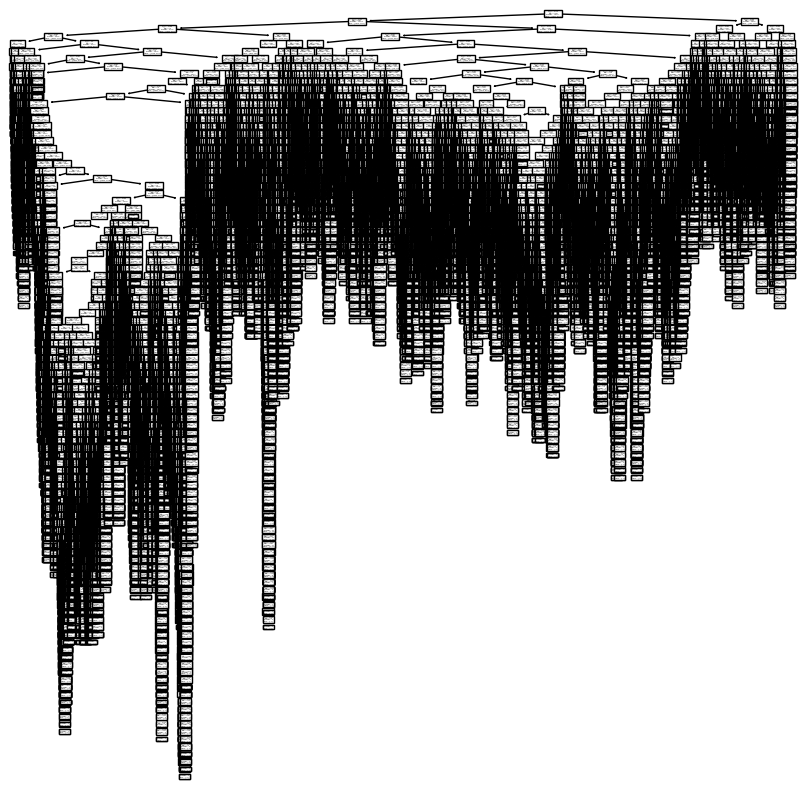

In [ ]:
#no funciona
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(arbolCasen)

Algoritmo -  Redes neuronales

In [ ]:
neuralCasen = MLPClassifier()
predictoras = df[['y1', 'ytoth', 'edad']]
objetivas = df['sexo']

neuralCasen.fit(predictoras, objetivas)

MLPClassifier()

In [ ]:
neuralCasen.predict_proba([[12000, 3300, 40], [123023, 2131, 50]])

array([[1., 0.],
       [1., 0.]])

In [ ]:
neuralCasen.predict([[12000, 3300, 40], [123023, 2131, 50]])

array(['Hombre', 'Hombre'], dtype='<U6')

In [ ]:
predictoras_kmeans = df[['y1', 'ytoth', 'edad', 'esc', 'p6', 'p8', 'y2_dias', 'y0701']]
X = predictoras_kmeans
X

,y1,ytoth,edad,esc,p6,p8,y2_dias,y0701
0,654504.216499,390833.0,34.0,12.000000,2.0,2.383119,23.478813,150000.000000
1,654504.216499,390833.0,4.0,11.349907,2.0,2.383119,23.478813,454815.725655
2,372000.000000,947583.0,45.0,15.000000,3.0,2.383119,8.000000,454815.725655
3,654504.216499,947583.0,5.0,11.349907,3.0,2.383119,23.478813,454815.725655
4,654504.216499,947583.0,19.0,11.349907,3.0,2.383119,23.478813,454815.725655
...,...,...,...,...,...,...,...,...
185432,654504.216499,273750.0,21.0,12.000000,4.0,2.383119,23.478813,454815.725655
185433,654504.216499,273750.0,46.0,0.000000,4.0,2.383119,23.478813,454815.725655
185434,654504.216499,0.0,71.0,17.000000,3.0,2.383119,23.478813,454815.725655
185435,654504.216499,0.0,66.0,8.000000,3.0,2.383119,23.478813,454815.725655


Algoritmo - K Means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=1)

In [ ]:
X['Cluster'] = kmeans.labels_
X

,y1,ytoth,edad,esc,p6,p8,y2_dias,y0701,Cluster
0,654504.216499,390833.0,34.0,12.000000,2.0,2.383119,23.478813,150000.000000,0
1,654504.216499,390833.0,4.0,11.349907,2.0,2.383119,23.478813,454815.725655,0
2,372000.000000,947583.0,45.0,15.000000,3.0,2.383119,8.000000,454815.725655,2
3,654504.216499,947583.0,5.0,11.349907,3.0,2.383119,23.478813,454815.725655,2
4,654504.216499,947583.0,19.0,11.349907,3.0,2.383119,23.478813,454815.725655,2
...,...,...,...,...,...,...,...,...,...
185432,654504.216499,273750.0,21.0,12.000000,4.0,2.383119,23.478813,454815.725655,0
185433,654504.216499,273750.0,46.0,0.000000,4.0,2.383119,23.478813,454815.725655,0
185434,654504.216499,0.0,71.0,17.000000,3.0,2.383119,23.478813,454815.725655,0
185435,654504.216499,0.0,66.0,8.000000,3.0,2.383119,23.478813,454815.725655,0


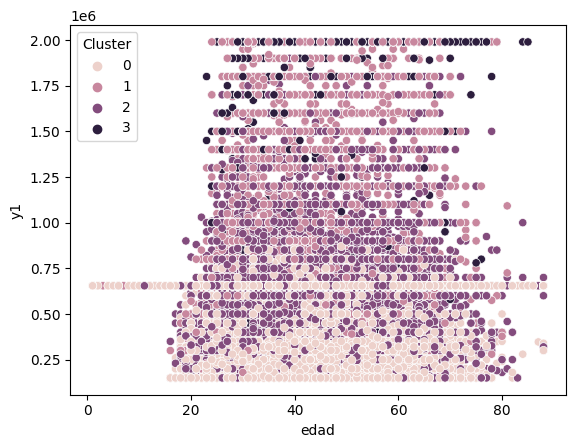

In [ ]:
sns.scatterplot(data = X, x='edad', y='y1', hue='Cluster' );

In [ ]:
escalador = StandardScaler()
x_exc = escalador.fit_transform(X)
#para estandarizar los datos

In [ ]:
X

,y1,ytoth,edad,esc,p6,p8,y2_dias,y0701,Cluster
0,654504.216499,390833.0,34.0,12.000000,2.0,2.383119,23.478813,150000.000000,0
1,654504.216499,390833.0,4.0,11.349907,2.0,2.383119,23.478813,454815.725655,0
2,372000.000000,947583.0,45.0,15.000000,3.0,2.383119,8.000000,454815.725655,2
3,654504.216499,947583.0,5.0,11.349907,3.0,2.383119,23.478813,454815.725655,2
4,654504.216499,947583.0,19.0,11.349907,3.0,2.383119,23.478813,454815.725655,2
...,...,...,...,...,...,...,...,...,...
185432,654504.216499,273750.0,21.0,12.000000,4.0,2.383119,23.478813,454815.725655,0
185433,654504.216499,273750.0,46.0,0.000000,4.0,2.383119,23.478813,454815.725655,0
185434,654504.216499,0.0,71.0,17.000000,3.0,2.383119,23.478813,454815.725655,0
185435,654504.216499,0.0,66.0,8.000000,3.0,2.383119,23.478813,454815.725655,0


#Conclusión:

Con respecto a los pequeños modelos que hemos podido ver, podemos decir que en este caso podemos encontrar varios problemas de underfitting, debido a que las métricas que tenemos no bastan para poder determinar las brechas entre hombres y mujeres pero si ya van identificando (poorly) ciertos patrones, algunas de las mejoras que podemos hacer son agregar metricas de mejor calidad quizás cambiar algunas categoricas por numericas, para que así pueda variar mejor las implementacion y reconocimiento de patrones.

Dentro de los pasos a seguir, están también: romper las relaciones de dependencia que son fuertes o muy fuertes para que no haya redundancia de los datos y que nuestro modelo no se sesgue con cierta información.

Seguiremos buscando las mejores variables para poder encontrar esta brecha salarial. Hasta el momento el patrón reconocido por los modelos es algo confuso, debido a que como mostramos en la grafica, la mayoría de las encuestadas son mujeres, las mujeres viven más que los hombres y están se encuentran activas mas tiempo pero por algun motivo ningun modelo predijo a una mujer, sino que solo hombres, es curioso y definitivamente, emocionante de seguir investigando.